# Predicting Continuous Target Variables with Regression Analysis

Throughout the previous chapters, you learned a lot about the main concepts behind **supervised leaning** and trained many different models for classification tasks to predict group memberships or categorical variables. In this chapter, we will dive into another subcategory of supervised learning: **regression analysis**. 

Regression models are used to predict target variables on a continuous scale, which makes them attractive for addressing many questions in science as well as applications in industry, such as understanding relationship between variables, evaluating trends, or making forecasts. One example would be predicting the sales of a company in future months. 

In this chapter, we will discuss the main concepts of regression models and cover the following topics:

* Exploring and visualizing dataset
* Looking at different approachs to implement linear regression models
* Training regression models that are robust to outliers
* Evaluating regression models and diagnosing common problems
* Fitting regression models to nonlinear data

# Introducing linear regression

The goal of linear regression is to model the relationship between one or multiple features and a continuous target variable. As discussed earlier, regression analysis is a subcategory of supervised machine learning. In contrast to classification - another subcategory of supervised learning - regression analysis aims to predict outputs on a continuous scale rather than categorical class labels. 

In the following subsections, we will introduce the most basic type of linear regression, simple linear regression, and relate it to the more general, multivariate case (linear regression with multiple features). 

## Simple linear regression

The goal of simple (**univariate**) linear regression is to model the relationship between a singe feature (**explanatory variable** x) and a continuous valued **response** (**target variable** y). The equation of a linear model with one explanatory variable is defined as follows:

$$y = w_0 + w_1x$$

Here, the weigth $w_0$ represents the *y*-axis intercept and $w_1$ is the weight coefficient of the explanatory variable. Our goal is to learn the weights of the linear equation to describe the relationship between the explanatory variable and the target variable, which can then be used to predict the responses of new explanatory variables that were not part of the training dataset. 

Based on the linear equation that we defined previously, linear regression can be understood as finding the best-fitting straight line through the sample points, as shown in the following figure: 

<img src='images/10_01.png'>

This best-fitting line is also called the **regression line**, and the vertical lines from the regression line to the sample points are the so-called **offsets** or **residuals** - the errors of our prediction. 

## Multiple linear regression

The special case of linear regression with one explanatory variable that we introduced in the previous subsection is also called **simple linear regression**. Of course, we can also generalize the linear regression model to multiple explanatory variables; this process is called **multiple linear regression**: 

$$y = w_0x_0 + w_1x_1 + \ldots + w_mx_m = \sum_{i=0}^m w_ix_i = w^Tx$$

Here, $w_0$ is the *y*-axis intercept with $x_0 = 1$.

The following figure shows how the two-dimensional, fitted hyperplane of a multiple linear regression model with two features could look: 

<img src='images/10_15.png'>

As we can see, visualizing multiple linear regression fits in three-dimensional scatter plot are already challenging to interpret when looking at static figures. Since we have no good means of visualizing hyperplanes with two dimensions in the scatterplot (multiple linear regression models fits to datasets with three or more features), the examples and visualizations in this chapter will mainly focus on the univariate case, using simple linear regression. However, simple and multiple linear regression are based on the same concepts and the same evaluation techniques; the code implementations that we will discuss in this chapter are also compatible with both types of regression model. 

# Exploring the Housing dataset

Before we implement our first linear regression model, we will introduce a new dataset, the Housing dataset, which contains information about houses in the suburbs of Boston collected by D. Harrison and D.L. Rubinfeld in 1978. The Housing dataset has been made freely available and is included in the code bundle of this book. As with each new dataset, it is always helpful to explore the data through a simple visualization, to get a better feeling of what we are working with. 

## Loading the Housing dataset into a data frame

In this section, we will load the Housing dataset using the pandas *read_csv* function, which is fast and versatile - a recommended tool for working with tabular data stored in a plaintext format. 

The features of the 506 samples in the Housing dataset are summarized here: 

* CRIM: Per capita crime rate by town
* ZN: Proportion of residential land zoned for lots over 25.000 sq. ft.
* INDUS: Proportion of non-retail business acres per town
* CHAS: Charler River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: Nitric oxide concentration (parts per 10 million)
* RM: Average number of rooms per dwelling
* AGE: Proportion of owner-occupied units built prior to 1940
* DIS: Weighted distances to five Boston employment centers
* RAD: Index of accessibility to radial highways
* TAX: Full-value property tax rate per \$10.000
* PTRATIO: Pupil-teacher ratio by town
* B: 1000(bk - 0.63)^2, where Bk is the proportion of people of African American descent by town
* LSTAT: Percentage of lower status of the population
* MEDV: Median value of owner-occupied homes in \$1000s

For the rest of this chapter, we will regard the house prices (MEDV) as our target variable - the variable that we want to predict using one or more of the 13 explanatory variables. Before we explore this dataset further, let us copy it from the UCI repository intoa pandas DataFrame: 

In [1]:
import pandas as pd

df = pd.read_csv('housing.data.txt', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
              'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Visualizing the important characteristics of a dataset

**Exploratory Data Analysis (EDA)** is an important and recommended first step prior to the training of a machine learning model. In the rest of this section, we will use some simple yet useful techniques from the graphical EDA toolbox that may help us to visually detect the presence of outliers, the distribution of the data, and the relationship between variables. 

First, we will create a **scatterplot matrix** that allows us to visualize the pair-wise correlations between the different features in this dataset in one place. To plot the scatterplot matrix, we will use the *pairplot* function from the Seaborn library, which is a Python library for drawing statistical plots based on Matplotlib. 

You can install *seaborn* package via *pip install seaborn*. After the installation is complete, you can import the package and create the scatterplot matrix as follows: 

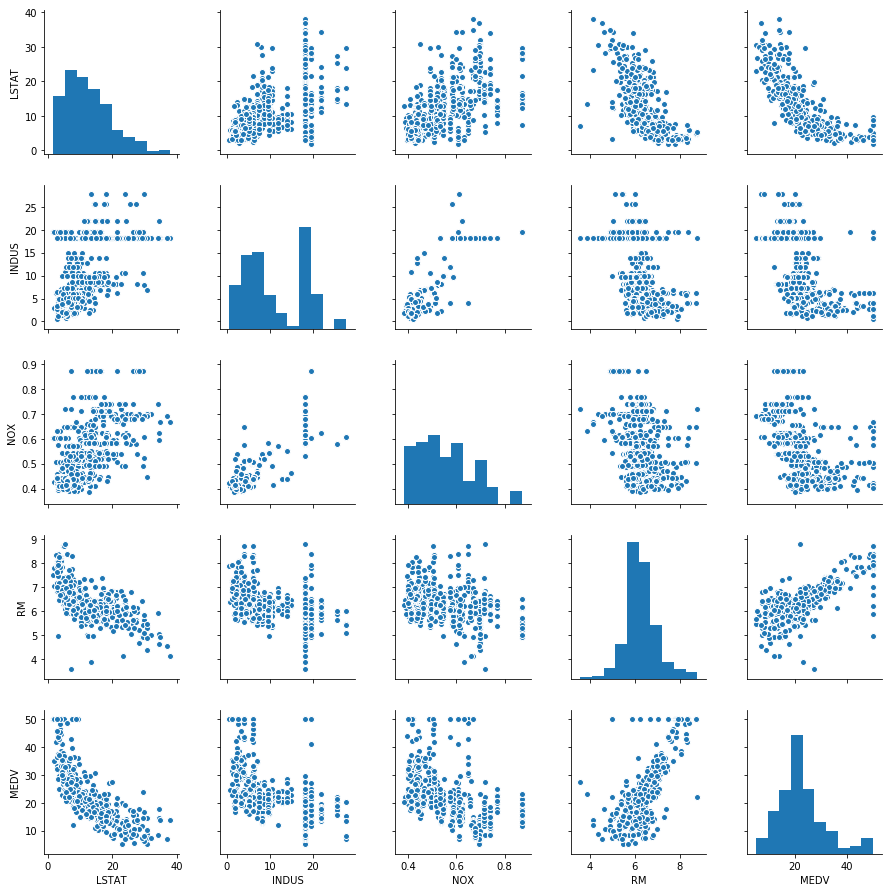

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()

Due to space constaints and in the interest of readability, we only plotted five columns from the dataset: *LSTAT*, *INDUS*, *NOX*, *RM*, and *MEDV*. However, you are encouraged to create a scatterplot matrix of the whole *DataFrame* to explore the dataset further by choosing different column names in the previous *sns.pairplot* call, or include all variables in the scatterplot matrix by omitting the column selector (*sns.pairplot(df)*). 

Using this scatterplot matrix, we can now quickly eyeball how the data is distributed and whether it contains outliers. For example, we can see that there is a linear relationship between *RM* and house prices, *MEDV* (the fifth column of the fourth row). Furthermore, we can see in the histogram - the lower-right subplot in the scatter plot matrix - that the *MEDV* variable seems to be normally distributed but contains several outliers. 

Note that in contrast to common belief, training a linear regression model does not require that the explanatory or target variables are normally distributed. The normality assumption is only a requirement for certain statistics and hypothesis tests that are beyond the scope of this book. 

## Looking at relationships using a correlation matrix

In the previous section, we visualized the data distributions of the Housing dataset variables in the form of histograms and scatter plots. Next, we will create a correlation matrix to quantify and summarize linear relationships between variables. A correlation matrix is closely related to the covariance matrix that we have seen in the section about **Principal Component Analysis (PCA)**. Intuitively, we can interpret the correlation matrix as a rescaled version of the covariance matrix. In fact, the correlation matrix is identical to a covariance matrix computed from standardized features. 

The correlation matrix is a square matrix that contains the **Pearson product-moment correlation coefficient** (often abbreviated as **Pearson's r**), which measures the linear dependence between pairs of features. The correlation coefficients are in the range -1 to 1. Two features have a perfect positive correlation if $r=1$, no correlation if $r=0$, and a perfect negative correlation if $r=-1$. As mentioned previously, Pearson's correlation coefficient can simply be calculated as the covariance between two features $x$ and $y$ (numerator) divided by the product of their standard deviations (denominator): 

$r = \frac{\sum_{i=1}^n \left[ (x^{(i)} - \mu_x)(y^{(i)} - \mu_y) \right]}{\sqrt{\sum_{i=1}^n (x^{(i)} - \mu_x)^2} \sqrt{\sum_{i=1}^n(y^{(i)} - \mu_y)^2}} = \frac{\sigma_{xy}}{\sigma_x \sigma_y}$

Here, $\mu$ denotes the sample mean of the corresponding feature, $\sigma_{xy}$ is the covariance betweent the variables $x$ and $y$, and $\sigma_x$ and $\sigma_y$ are the features' standard deviation. 

In the following code example, we will use NumPy's *corrcoef* function on the five feature columns that we previously visualized in the scatterplot matrix, and we will use Seaborn's *heatmap* function to plot the correlation matrix array as a heat map: 

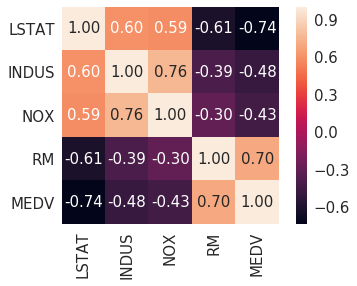

In [3]:
import numpy as np

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 15}, 
                 yticklabels=cols, xticklabels=cols)
plt.show()

To fit a linear regression model, we are interested in those features that have a high correlation with our target variable *MEDV*. Looking at the previous correlation matrix, we see that our target variable *MEDV* shows the largest correlation with the *LSTAT* variable (-0.74); however, as you might remember from inspecting the scatterplot matrix, there is a clean nonlinear relationship between *LSTAT* and *MEDV*. On the other hand, the correlation between *RM* and *MEDV* is also relatively high (0.70). Given the linear relationship between these two variables that we observed in the scatterplot, *RM* seems to be a good choice for an exploratory variable to introduce the concepts of a simple linear regression model in the following subsection. 

# Implementing an ordinary least squares linear regression model

At the beginning of this chapter, we mentioned that linear regression can be understood as obtaining the best-fitting straight line through the sample points of our training data. However, we have neither defined the term **best-fitting** nor have we discussed the different techniques of fitting such a model. In the following subsections, we will fill in the missing pieces of this puzzle using the **Ordinary Least Squares (OLS)** method (sometimes also called **linear least squares**) to estimate the parameters of the linear regression line that minimizes the sum of the squared vertical distances (residuals or errors) to the sample points. 

## Solving regression for regression parameters with gradient descent 

Consider our implementations of the **ADAptive LInear NEuron (Adaline)**; we remember that the artificial neuron uses a linear activation function. Also, we defined a cost function $J$, which we minimized to learn the weights via optimizatino algorithms, such as **Gradient Descent (GD)** and **Stochastic Gradient Descent (SGD)**. This cost function in Adaline is the **Sum of Squared Errors (SSE)**, which is identical to the cost function that we use for OLS: 

$$J(w) = \frac{1}{2}\sum_{i=1}^n(y^{(i)} - ŷ^{(i)})^2$$

Here, $ŷ$ is the predicted value $ŷ = w^Tx$. Essentialy, OLS regression can be understood as Adaline without the unit step function so that we obtain continuous target values instead of the class models -1 and 1. To demonstrate this, let us take the GD implementation of the Adaline and remove the unit step function to implement our first linear regression model: 

In [4]:
class LinearRegressionGD(object):
    
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)

To see our *LinearRegressionGD* regressor in action, let's use the *RM* (number of rooms) variable from the Housing dataset as the explanatory variable and train a model that can predict *MEDV* (house prices). Furthermore, we will standardize the variables for better convergence of the GD algorithm. The code is as follows: 

In [5]:
from sklearn.preprocessing import StandardScaler

X = df[['RM']].values
y = df[['MEDV']].values

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y).flatten()

lr = LinearRegressionGD()
lr.fit(X_std, y_std)

We discussed previously that it is always a good idea to plot the cost as a function of the number of epochs passes over the training dataset when we are using optimization algorithms, such as gradient descent, to check the algorithm converged to a cost minimum (here, a global cost minimum): 

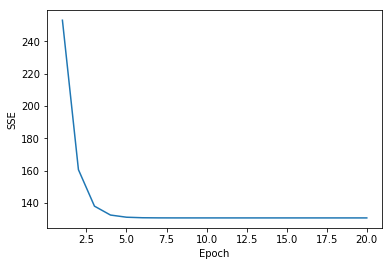

In [6]:
sns.reset_orig()
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

Next, let's visualized how well the linear regression line fits to the training data. To do so, we will define a simple helper function that will plot a scatterplot of the training samples and add the regression line: 

In [7]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

Now, we will use this *lin_regplot* function to plot the number of rooms against house price: 

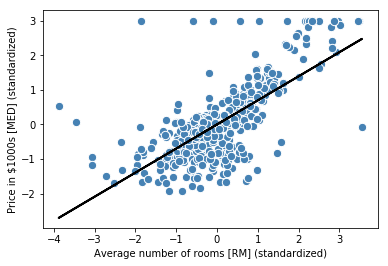

In [8]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MED] (standardized)')
plt.show()

As we can see in the resulting plot, the linear regression line reflects the general trend that house prices tend to increase with the number of rooms. 

Although this observation makes intuitive sense, the data also tells us that the number of rooms does not explain the house prices very well in many cases. Later in this chapter, we will discuss how to quantify the performance of a regression model. Interestingly, we also observe that several data points lined up at $y=3$, which suggests that the prices may have been clipped. In certain applications, it may also be important to report the predicted outcome variables on their original scale. To scale the predicted price outcome back onto *Price in $1000s* axis, we can simply apply the *inverse_transform* method of the *StandardScaler*: 

In [9]:
num_rooms_std = sc_x.transform(np.array([5.0]).reshape(1, -1))
price_std = lr.predict(num_rooms_std)
print('Price in $1000s: %.3f' % sc_y.inverse_transform(price_std))

Price in $1000s: 10.840


In this code example, we used the previously trained linear regression model to predict the price of a house with five rooms. According to our model, such a house is worth \$10.840. 

On a side note, it is also worth mentioning that we technically do not have to update the weights of the intercept if we are working with standardized variables since the *y*-axis intercept is always 0 in those cases. We can quickly confirm this by printing the weights: 

In [10]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %3f' % lr.w_[0])

Slope: 0.695
Intercept: -0.000000


## Estimating coefficient of a regression model via scikit-learn

In the previous section, we implemented a working model for regression analysis; however, in a real-world application we may be interested in more efficient implementations. For example, many of scikit-learn's estimators for regression make use of the **LIBLINEAR** library, advanced optimization algorithms, and other code optimizations that work better with unstandardized variables, which is sometimes desirable for certain applications: 

In [11]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


As we can see from executing this code, scikit-learn's *LinearRegression* model, fitted with the unstardardized *RM* and *MEDV* variables, yielded different model coefficients. Let's compare it to our GD implementation by plotting *MEDV* against *RM*: 

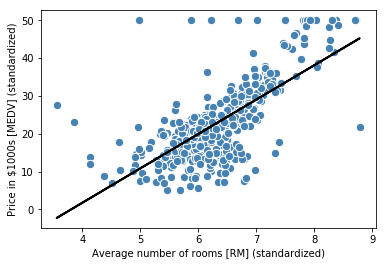

In [12]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

Now, when we plot the training data and our fitted model by executing this code, we can see that the overall result looks identical to our GD implementation. 

As an alternative to using machine learning libraries, there is also a closed-form solution for solving OLS involving a system of linear equations that can be found in most introductory statistics textbooks: 

$$w = (X^TX)^{-1}X^Ty$$

We can implement it in Python as follows:

In [13]:
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))
print('Slope: %.3f' % w[1])
print('Intercept: %.3f' % w[0])

Slope: 9.102
Intercept: -34.671


The advantage of this method is that it is guaranteed to find the optimal solution analytically. However, if we are working with very large databasets, it can be computationally too expensive to inverte the matrix in this formula (sometimes also called the **normal equation**) or the sample matrix may be singular (non-invertible), which is why we may prefer iterative methods in certain cases. 

# Fitting a robust regression model using RANSAC

Linear regression models can be heavily impacted by the presence of outliers. In certain situation, a very small subset of our data can have a big effect on the estimated model coefficients. There are many statistical tests that can be used to detect outliers, which are beyond the scop of the book. However, removing outliers always require our own judgement as data scientists as well as our domain knowledge. 

As an alternative to throwing out outliers, we will look at a robust method of regression using the **RANdom SAmple Consensus (RANSAC)** algorithm, which fits a regression model to a subset of the data, the so-called inliers. 

We can summarize the iterative RANSAC algorithm as follows: 

1. Select a random number of samples to be inliers and fit the model.
2. Test all other data points against the fitted model and add those points that fall within a user-given tolerance to the inliers. 
3. Refit the model using all inliers. 
4. Estimate the error of the fitted model versus the inliers. 
5. Terminate the algorithm if the performance meets a certain user-defined threshold or if a fixed number of iterations were reached; go back to step 1 otherwise. 

Let us wrap our linear model in the RANSAC algorithm using scikit-learn'a *RANSACRegressor* class:

In [14]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_loss', 
                         residual_threshold=5.0, 
                         random_state=0)
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=50, random_state=0,
        residual_metric=None, residual_threshold=5.0, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

We set the maximum number of iterations of the *RANSACRegressor* to 100, and using *min_samples=50*, we set the minimum number of the randomly chosen samples to be at least 50. Using the *'absolute_loss'* as an argument for the *residual_metric* parameter, the algorithm computes absolute vertical distances between the fitted line and the sample points. By setting the *residual_threshold* parameter to 5.0, we only allowed samples to be included in the inlier set if their vertical distance to the fitted line is within 5 distance units, which works well on this particular dataset. 

By default, scikit-learn uses the **MAD** estimate to select the inlier threshold, where MAD stands for the **Median Absolute Deviation** of the target values *y*. However, the choice of an appropriate value for the inlier threshold is problem-specific, which is one disadvantage of RANSAC. Many different approaches have been developed in recent years to select a good inlier threshold automatically. 

After we fit the RANSAC model, let's obtain the inliers and outliers from the fitted RANSAC-linear regression model and plot them together with the linear fit: 

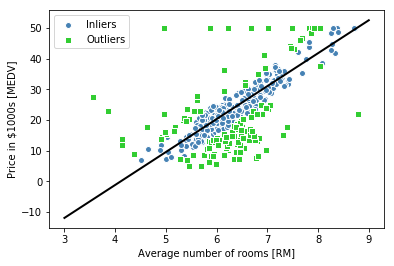

In [15]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], 
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')
plt.show()

As we can see in the resulting scatterplot, the linear regression model was fitted on the detected set of inliers, shown as circles. 

When we print the slope and intercept of the model by executing the following code, we can see that the linear regression line is slightly different from the fit that we obtained in the previous section without using RANSAC:

In [16]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.735
Intercept: -44.089


Using RANSAC, we reduced the potential effect of the outliers in this dataset, but we do not know if this approach has a positive effect on the predictive performance for unseen data. Thus, in the next section we will look at different approaches to evaluating a regression model, which is a crucial part of building systems for predictive modeling. 

# Evaluating the performance of linear regression models

In the previous section, we learned how to fit a regression model on training data. However, you learned in the previous chapters that it is crucial to test the model on data that it has not seen during training to obtain a more unbiased estimate of its performance. 

As we remember, we want to split our dataset into separate training and test datasets where we use the former to fit the model and the latter to evaluate its performance to generalize to unseen data. Instead of proceeding with the simple regression model, we will now use all variables in the dataset and train a multiple regression model:

In [17]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

Since our model uses multiple explanatory variables, we cannot visualize the linear regression line (or hyperplane to be precise) in a two-dimensional plot, but we can plot the residuals (the differences or vertical distances between the actual and predicted values) versus the predicted values to diagnose our regression model. **Residual plots** are a commonly used graphical tool for diagnosing regression models. They can help detect nonlinearity and outliers, and check whether the errors are randomly distributed. 

Using the following code, we will now plot a residual plot where we simply subtract the true target variables from our predicted responses:

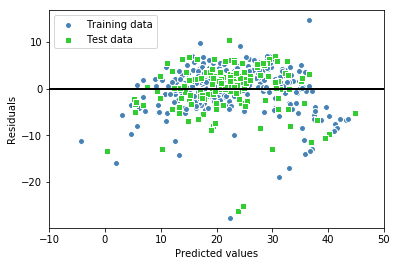

In [18]:
plt.scatter(y_train_pred, y_train_pred-y_train, 
            c='steelblue', marker='o', edgecolor='white', 
            label='Training data')
plt.scatter(y_test_pred, y_test_pred-y_test, 
            c='limegreen', marker='s', edgecolor='white', 
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

In case of a perfect prediction, the residuals would be exactly zero, which we will probably never encounter in realistic and practical applications. However, for a good regression model, we would expect that the errors are randomly distributed and the residuals should be randomly scattered around the centerline. If we see patterns in a residual plot, it means that our model is unable to capture some explanatory information, which has leaked into the residuals, as we can slightly see in our previous residual plot. Furthermore, we can also use residual plots to detect outliers, which are represented by the points with a large deviation from the centerline. 

Another useful quantitative measure of a model's performance is the so-called **Mean Squared Error (MSE)**, which is simply the averaged value of the SSE cost that we minimized to fit the linear regression model. The MSE is useful to compare different regression models or for tuning their parameters via grid search and cross-validation, as it normalizes the SSE by the sample size. 

Let's compute the MSE of our training and test predictions:

In [19]:
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' 
      % (mean_squared_error(y_train, y_train_pred), 
         mean_squared_error(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196


We see that the MSE on the training set is 19.96, and the MSE of the test set is much larger, with a value of 27.20, which is an indicator that our model is overfitting the training data. 

Sometimes it may be more useful to report the **coefficient of determination $R^2$**, which can be understood as a standardized version of the MSE, for better interpretability of the model's performance. Or in other words, $R^2$ is the fraction of response variance that is captured by the model. The $R^2$ value is defined as: 

$$R^2 = 1 - \frac{SSE}{SST}$$

Here, SSE is the sum of squared errors and SST is the total sum of squares: 

$$SST = \sum_{i=1}^n (y^{(i)} - \mu_\gamma)^2$$

In other words, SST is simply the variance of the response. 

For the training dataset, the $R^2$ is bounded between 0 and 1, but it can become negative for the test set. If $R^2 = 1$, the model fits the data perfectly with a corresponding MSE = 0. 

Evaluated on the training data, the $R^2$ of our model is 0.765, which does not sound too bad. However, the $R^2$ on the test dataset is only 0.673, which we can compute by executing the following code: 

In [20]:
from sklearn.metrics import r2_score

print('R^2 train: %.3f, test: %.3f' 
      % (r2_score(y_train, y_train_pred), 
         r2_score(y_test, y_test_pred)))

R^2 train: 0.765, test: 0.673


# Using regularized methods for regression

As we discussed before, regularization is one approach to tackle the problem of overfitting by adding additional information, and thereby shrinking the parameter values of the model to induce a penalty against complexity. The most popular approaches to regularized linear regression are the so-called **Ridge Regression, Least Absolute Shrinkage and Selection Operator (LASSO)**, and **Elastic Net**. 

Ridge regression is an L2 penalized model where we simply add the squared sum of the weights to our least-squares cost function. 

By increasing the value of hyperparameter $\gamma$, we increase the regularization strength and shrink the weights of our model. Please note that we do not regularize the intercept term $w_0$. 

An alternative approach that can lead to sparse models is LASSO. Depending on the regularization strength, certain weights can become zero, which also makes LASSO useful as a supervised feature selection technique. 

However, a limitation of LASSO is that it selects at most $n$ variables if $m > n$. A compromise between Ridge regression and LASSO is Elastic Net, which has an L1 penalty to generate sparsity and an L2 penalty to overcome some of the limitations of LASSO, such as the number of selected variables. 

Those regularized regression models are all available via scikit-learn, and the usage is similar to the regular regression model except that we have to specify the regularization strength via the parameter $\gamma$, for example, optimized via k-fold cross-validation.

A Ridge regression model can be initialized via:

In [21]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)

Note that the regularization strength is regulated by the parameter *alpha*, which is similar to the parameter $\lambda$. Likewise, we can initialize a LASSO regressor from the *linear_model* submodule:

In [22]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)

Lastly, the *ElasticNet* implementation allows us to vary the L1 and L2 ratio:

In [23]:
from sklearn.linear_model import ElasticNet

elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

For example, if we set the *l1_ratio* to 1.0, the *ElasticNet* regressor would be equal to the LASSO regression.

# Turning a linear regression model into a curve - polynomial regression

In the previous sections, we assumed a linear relationship between explanatory and response variables. One way to account for the violation of linearity assumption is to use a polynomial regression model by adding polynomial terms: 

$$y = w_0 + w_1x + w_2x^2 + \ldots + w_dx^d$$

Here, $d$ denotes the degree of the polynomial. Although we can use polynomial regression to model a nonlinear relationship, it is still considered a multiple linear regression model because of the linear regression coefficients $w$. In the following subsections, we will see how we can add such polynomial terms to an existing dataset conveniently and fit a polynomial regression model. 

## Adding a polynomial terms using scikit-learn

We will now learn how to use *PolynomialFeatures* transform class from scikit-learn to add a quadratic term ($d = 2$) to a simple regression problem with one explanatory variable. Then, we compare the polynomial to the linear fit following these steps: 

1 - Add a second degree polynomial term:

In [24]:
from sklearn.preprocessing import PolynomialFeatures

X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 
              368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 
              342.2, 360.8, 368.0, 391.2, 390.8])

lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

2 - Fit a simple linear regression model for comparison: 

In [25]:
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

3 - Fit a multiple regression model on the transformed features for polynomial regression: 

In [26]:
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

4 - Plot the results: 

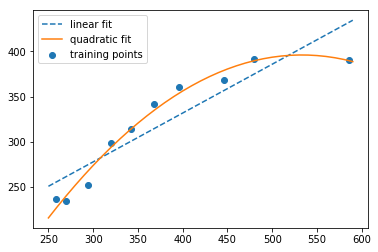

In [27]:
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')
plt.show()

In the resulting plot, we can see that the polynomial fit captures the relationship between the response and explanatory variable much better than the linear fit. 

In [28]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print('Training MSE linear: %.3f, quadratic: %.3f'
       % (mean_squared_error(y, y_lin_pred), 
          mean_squared_error(y, y_quad_pred)))
print('Training R^2 linear: %.3f, quadratic: %.3f'
       % (r2_score(y, y_lin_pred), 
          r2_score(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


As we can see after executing the code, the MSE decreased from 570 (linear fit) to 61 (quadratic fit); also, the coefficiet of determination reflects a closer fit of the quadratic model ($R^2 = 0.982$) as opposed to the linear fit ($R^2 = 0.832$) in this particular toy problem. 

## Modeling nonlinear relationships in the Housing dataset

After we learned how to construct polynomial features to fit nonlinear relationships in a toy problem, let's now take a look at a more concrete example and apply those concepts to the data in the Housing dataset. By executing the following code, we will model the relationship between house prices and *LSTAT* (percent lower status of the population) as using second degree (quadratic) and third degree (cubic) polynomials and compare it to a linear fit:

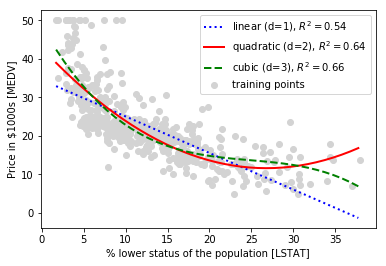

In [29]:
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

# plot results
plt.scatter(X, y, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', lw=2, linestyle=':')
plt.plot(X_fit, y_quad_fit, label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2, 
         color='red', lw=2, linestyle='-')
plt.plot(X_fit, y_cubic_fit, label='cubic (d=3), $R^2=%.2f$' % cubic_r2, 
         color='green', lw=2, linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')
plt.show()

As we can see, the cubic fit captures the relationship between house prices and LSTAT better than the linear and quadratic fit. However, we should be aware that adding more and more polynomial features increases the complexity of a model and therefore increases the chance of overfitting. Thus, in practice it is always recommended to evaluate the performance of the model on a separate test dataset to estimate the generalization performance. 

In addition, polynomial features are not always the best choice for modeling nonlinear relationships. For example, with some experience or intuition, just looking at the MEDV-LSTAT scatterplot may lead to the hypothesis that a log-transformation of the LSTAT feature variable and the square root of the MEDV may project the data onto a linear feature space suitable for a linear regression fit. For instance, my perception is that this relationship between the two variables looks quite similar to an exponential function: 

$$f(x) = 2^{-x}$$

Since the natural logarithm of an exponential function is a straigth line, I assume that such a log-transformation can be usefully applied here:

$$log(f(x)) = -x$$

Let's test this hypothesis by executing the following code: 

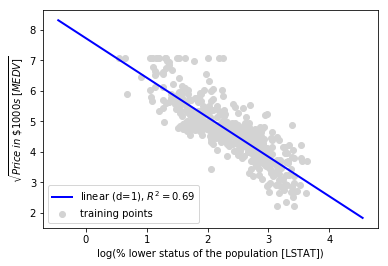

In [30]:
# transform features
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# fit features
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# plot results
plt.scatter(X_log, y_sqrt, label='training points', 
            color='lightgray')
plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', lw=2)
plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')
plt.show()

After transforming the explanatory onto the log space and taking the square root of the target variables, we were able to capture the relationship between the two variables with a linear regression line that seems to fit the data better ($R^2=0.69$) than any of the polynomial feature transformations previously. 

# Dealing with nonlinear relationships using random forests

In this section, we are going to take a look at **random forest** regression, which is conceptually different from the previous regression models in this chapter. A random forest, which is an ensemble of multiple **decision trees**, can be understood as the sum of piecewise linear functions in contrast to the global linear and polynomial regression models that we discussed previously. In other words, via the decision tree algorithm, we are subdividing the input space into smaller regions that become more manageable. 

## Decision tree regression

An advantage of the decision tree algorithm is that it does not require any transformation of the features if we are dealing with nonlinear data. We remember that we grow a decision tree by iteratively splitting its nodes until the leaves are pure or a stopping critetion is satistied. When we used decision trees for classification, we defined entropy as a measure of impurity to determine which feature split maximizes the **Information Gain (IG)**, which can be defined as follows for a binary split:

$$IG(d_v, x_i) = I(D_v) - \frac{N_{left}}{N_y}I(D_{left})-\frac{N_{right}}{N_p}I(D_{right})$$

Here, $x$ is the feature to perform the split, $N_p$ is the number of samples in the parent node, $I$ is the impurity function, $D_v$ is the subset of training samples at the parent node, and $D_{left}$ and $D_{right}$ are the subsets of training samples at the left and right child node after the split. Remember that our goal is to find the feature split that maximizes the information gain; in other words, we want to find the feature split that reduces the impurities in the child nodes most. We discussed Gini impurity and entropy as measures of impurity, which are both useful criteria for classification. To use a decision tree for regression, however, we need an impurity metric that is suitable for continuous variables, so we define the impurity measure of a node $t$ as the MSE instead: 

$$l(t) = MSE(t) = \frac{1}{N_t}\sum(y^{(i)} - ŷ_t)^2$$

Here, $N_t$ is the number of training samples at node $t$, $D_t$ is the training subset at node $t$, $y^{(i)}$ is the true target value, and $ŷ_t$ is the predicted target value (sample mean):

$$ŷ_t = \frac{1}{N_t}\sum_{i \in D_t}y^{(i)}$$

In the context of decision tree regression, the MSE is often also referred to as **within-node variance**, which is why the splitting criterion is lso better known as **variance reduction**. To see what the line fit of a decision tree looks like, let us use the *DecisionTreeRegressor* implemented in scikit-learn to model the nonlinear relationship between the *MEDV* and *LSTAT* variables:

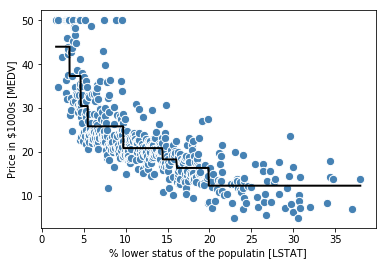

In [31]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)

plt.xlabel('% lower status of the populatin [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

As we can see in the resulting plot, the decision tree captures the general trend in the data. However, a limitation of this model is that it does not capture the continuity and differenciability of the desired prediction. In addition, we need to be careful about choosing an appropriate value for the depth of the tree to not overfit or underfit the data; here, a depth of three seemed to be a good choice. In the next section, we will take a look at a more robust way of fitting regression trees: random forests. 

## Random forest regression

As we learned, the random forest algorithm is an ensemble technique that combines multiple decision trees. A random forest usually has a better generalization performance than an individual decision tree due to randomness, which helps to decrease the model's variance. Other advantages of random forests are that they are less sensitive to outliers in the dataset and do not require much parameter tuning. The only parameter in random forests that we typically need to experiment with is the number of trees in the ensemble. The basic random forest algorithm for regression is almost identical to the random forest algorithm for classification that we discussed earlier, the only difference is that we use the MSE criterion to grow the individual decision trees, and the predicted target variable is calculated as the average prediction over all decision trees. 

Now, let's use all features in the Housing dataset to fit a random forest regression model on 60 percent of the samples and evaluate its performance on the remaining 40 percent. The code is as follows:

In [32]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = \
  train_test_split(X, y, test_size=0.4, random_state=1)

In [33]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [34]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' 
      % (mean_squared_error(y_train, y_train_pred), 
         mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' 
      % (r2_score(y_train, y_train_pred), 
         r2_score(y_test, y_test_pred)))

MSE train: 1.642, test: 11.052
R^2 train: 0.979, test: 0.878


Unfortunately, we see that the random forest tends to overfit the training data. However, it is still able to explain the relationship between the target and explanatory variables relatively well ($R^2 = 0.871$ on the test dataset). 

Lastly, let us take a look at the residuals of the prediction:

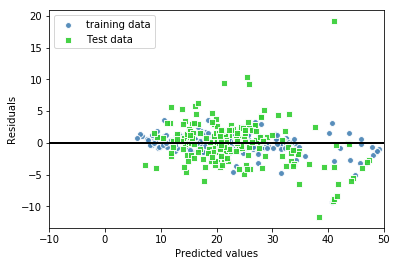

In [35]:
plt.scatter(y_train_pred, y_train_pred-y_train, 
            c='steelblue', edgecolor='white', 
            marker='o', s=35, alpha=0.9, 
            label='training data')
plt.scatter(y_test_pred, y_test_pred-y_test, 
            c='limegreen', edgecolor='white', 
            marker='s', s=35, alpha=0.9, 
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.show()

As it was already summarized by the $R^2$ coefficient, we can see that the model fits the training data better than the test data, as indicated by the outliers in the $y$-axis direction. Also, the distribution of the residual does not seem to be completely random around the zero center point, indicating that the model is not able to capture all the explanatory information. However, the residual indicates a large improvement over the residual plot of the linear model that we plotted earlier in this chapter. 

Ideally, our model error should be random or unpredictable. In other words, the error of the predictions should not be related to any of the information contained in the explanatory variables, but should reflect the randomness of the real-world distributions or patterns. If we observe patterns in the prediction errors, for example, by inspecting the residual plot, it means that the residual plots contain predictive information. A common reason for this could be that explanatory information is leaking into those residuals. 

Unfortunately, there is now a universal approach for dealing with non-randomness in resisual plot, and it requires experimentation. Depending on the data that is available to us, we may be able to improve the model by transforming variables, tuning the hyperparameters of the learning algorithm, choosing simpler or more complex models, removing outliers, or including additional variables. 

Previously, we also learned about the kernel trick, which can be used in combination with a **Support Vector Machine (SVM)** for classification, and is useful if we are dealing with nonlinear problems. Although a discussion is beyond the scope of this book, SVMs can also be used in nonlinear regression tasks. An SVM regressor is also implemented in scikit-learn. 

# Summary

At the beginning of this chapter, you learned about simple linear regression analysis to model the relationship between a single explanatory variable and a continuous response variable. We then discussed a useful explanatory data analysis techniques to look at patterns and anomalies in data, which is an important first step in predictive modeling tasks. 

We built our first model by implementing linear regression using a gradient-based optimization approach. We then saw how to utilize scikit-learn's linear models for regression and also implement a robust regression technique (RANSAC) as an approach for dealing with outliers. To assess the predictive performance of regression models, we computed the mean sum of squared errors and the related $R^2$ metric. Furthermore, we also discussed a useful graphical approach to diagnose problems of regression models: the residual plot. 

After we discussed how regularization can be applied to regression models to reduce the model complexity and avoid overfitting, we also introduced several approaches to model nonlinear relationships including polynomial feature transformation and random forest regressors. 

We have discussed supervised learning, classification, and regression analysis in great detail throughout the previous chapters. In the next chapter, we are going to learn about another interesting subfield of machine learning, unsupervised learning and also we will learn how to use cluster analysis for finding hidden patterns structures in data in the absence of target variables. 